Back to the main [Index](../index.ipynb)

### phrasedml
#### phrasedml experiment
Tellurium provides support for simulation descriptions in SED-ML the export in Combine Archive format.

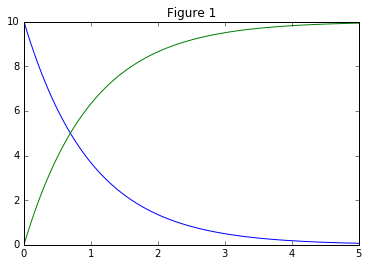

myModel = '''
model myModel
  S1 -> S2; k1*S1
  S1 = 10; S2 = 0
  k1 = 1
end
'''

# Translated SED-ML
# Beginning of generated script
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

# Execute the tasks of model: model1
model1 = te.loada(myModel)
model1.timeCourseSelections = ["time","S1","S2"]
t1 = model1.simulate(0, 5, 100)

# List of Data Generators
plot_0_0_0 = t1[0.0:,0]
plot_0_0_1 = t1[0.0:,1]
plot_0_1_1 = t1[0.0:,2]

# List of Outputs
Y_0 = np.array([plot_0_0_1, plot_0_1_1]).T
plt.plot(plot_0_0_0, Y_0)
plt.title('Figure 1')
plt.show()

# End of generated script


In [1]:
%matplotlib inline
from __future__ import print_function
import tellurium as te

antimony = '''
model myModel
  S1 -> S2; k1*S1
  S1 = 10; S2 = 0
  k1 = 1
end
'''

phrasedml = '''
  model1 = model "myModel"
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  plot "Figure 1" time vs S1, S2
'''

# create an experiment and perform it
exp = te.experiment(antimony, phrasedml)

exp.execute()
exp.printpython()

#### Combine Archive
The experiment, i.e. model with the simulation description, can be stored as Combine Archive.

In [7]:
# create Combine Archive
import tempfile
f = tempfile.NamedTemporaryFile()
exp.exportAsCombine(f.name)

# print the content of the Combine Archive
import zipfile
zip=zipfile.ZipFile(f.name)
print(zip.namelist())

['myModel.xml', 'experiment1.xml', 'manifest.xml']
